Add a data set of temperature

How have the areas affected by wildfires changed over time? Is there a correlation between fire size and yearly temperature?

I picked this data set because it was the most comprehensive one that I could find. Most of the other ones only covered the last couple of years, but this one covers the past 50 years.

First I clean the data set. By removing collumns that don't offer any beneficial information, I make the dataset easier to work with and only keep necessary informaton.

/var/folders/n0/vnd66wn11990jhbfxvsz4h2m0000gp/T/ipykernel_69591/3340913498.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['GIS_ACRES'] = data2['GIS_ACRES'].dropna().astype(int)
/var/folders/n0/vnd66wn11990jhbfxvsz4h2m0000gp/T/ipykernel_69591/3340913498.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['GIS_ACRES'] = data2['GIS_ACRES'].dropna().astype(int)
/var/folders/n0/vnd66wn11990jhbfxvsz4h2m0000gp/T/ipykernel_69591/3340913498.py:71: SettingWithCopyWarning: 
A value is trying to be 

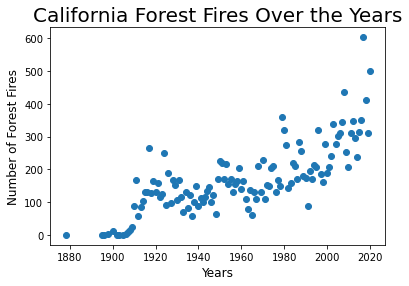

In [117]:
import pandas as pd
import os; os.system('clear')
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("California Fires.csv")

data.drop('OBJECTID', inplace=True, axis = 1)
data.drop('STATE', inplace=True, axis = 1)
data.drop('AGENCY', inplace=True, axis = 1)
data.drop('UNIT_ID', inplace=True, axis = 1)
data.drop('ALARM_DATE', inplace=True, axis = 1)
data.drop('CONT_DATE', inplace=True, axis = 1)
data.drop('INC_NUM', inplace=True, axis = 1)
data.drop('CAUSE', inplace=True, axis = 1)
data.drop('COMMENTS', inplace=True, axis = 1)
data.drop('FIRE_NUM', inplace=True, axis = 1)
data.drop('REPORT_AC', inplace=True, axis = 1)
data.drop('C_METHOD', inplace=True, axis = 1)
data.drop('OBJECTIVE', inplace=True, axis = 1)

# print(data.head())
# data.describe(include= "all")

data = data.replace(" ", np.nan)
data = data.replace("UKNOWN", np.nan)
data2 = data.dropna(subset=['FIRE_NAME'])

#areas that have the most fires over the years.
firesPerYear = data.groupby('FIRE_NAME')['YEAR_'].count()
firesPerYear = firesPerYear.to_frame()
firesPerYear.reset_index(level=0, inplace=True)
firesPerYear.sort_values(by= ['YEAR_'],inplace=True, ascending= False)
# plt.plot(firesPerYear)
# plt.title('Most Frequent Fire Locations', fontsize=20) 
# plt.xlabel('Locations', fontsize=12) 
# plt.ylabel('Frequenct', fontsize=12)

# print(firesPerYear)
# firesPerYear.head()

#fires overall throught the years
fireYearTotals = data.groupby('YEAR_')['SHAPE_Length'].count()
fireYearTotals = fireYearTotals.to_frame()
fireYearTotals.reset_index(level=0, inplace=True)
plt.scatter(fireYearTotals['YEAR_'], fireYearTotals['SHAPE_Length'])
plt.title('California Forest Fires Over the Years', fontsize=20) 
plt.xlabel('Years', fontsize=12) 
plt.ylabel('Number of Forest Fires', fontsize=12)

#How many Acres were burned each year
data2['GIS_ACRES'] = data2['GIS_ACRES'].dropna().astype(int)
fireSize = data2.groupby('YEAR_')['GIS_ACRES'].sum()
# plt.plot(fireSize)
# plt.title('Fire Sizes Per Year', fontsize=20) 
# plt.xlabel('Years', fontsize=12) 
# plt.ylabel('Fire Size', fontsize=12)

#Average Fire size
data2['GIS_ACRES'] = data2['GIS_ACRES'].dropna().astype(int)
AvSize = data2.groupby('YEAR_')['GIS_ACRES'].mean()
# plt.plot(AvSize)
# plt.title('Average Fire Size Per Year', fontsize=20) 
# plt.xlabel('Years', fontsize=12) 
# plt.ylabel('Average Fire Size', fontsize=12)

#do the housing CSV here
hdata = pd.read_excel("housing.xlsx")
hdata = hdata.replace(" ", np.nan)
hdata2 = hdata.dropna(subset=['CA'])
hdata2['Mon-Yr'] = pd.DatetimeIndex(hdata2['Mon-Yr']).year
housing = hdata2[['Mon-Yr','CA']]
housingChangePerYear = housing.groupby('Mon-Yr')['CA'].sum()
housingChangePerYear = housingChangePerYear.to_frame()
housingChangePerYear.reset_index(level=0, inplace=True)
# print(housingChangePerYear)

#how the the housing rates have changed from year to year
# plt.plot(housingChangePerYear['Mon-Yr'], housingChangePerYear['CA'])
# plt.title('Housing Changes (1991-2022)', fontsize=20) 
# plt.xlabel('Years', fontsize=12) 
# plt.ylabel('Housing Percent Change', fontsize=12)